In [0]:
!pip install kaggle


In [0]:
!mkdir .kaggle


mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json
token = {"username":"mssanjay","key":"63500b560696ce791d6ad3363a760246"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json


In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json


In [0]:
!kaggle config set -n path -v{/content}


- path is now set to: {/content}


In [0]:
!kaggle datasets download -d tentotheminus9/seti-data -p/content


In [0]:
!unzip \*.zip

In [0]:
ls

In [0]:
rm primary_small_v3.zip

In [0]:
ls

In [0]:
!unzip \*.zip

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [0]:
def pp(img,gray=False):
    img = cv2.resize(img, (224, 224))
    if gray:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean = np.mean(img)
    std = np.std(img)
    imag = np.clip(img, mean-3.5*std, mean+3.5*std)
  
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel=np.ones((3, 3), dtype=np.float32))
    x = cv2.Sobel(img, cv2.CV_64F, 1, 0, 2)
    y = cv2.Sobel(img, cv2.CV_64F, 0, 1, 2)
    img = cv2.addWeighted(src1=x, alpha=0.7, src2=y, beta=0.3, gamma=0)
    img = img.reshape(224, 224, 1)
    img = img/255
    return img
  

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(width_shift_range=0.01,
                                 height_shift_range=0.01,
                                 zoom_range=0.01,
                                 shear_range=0.01,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 preprocessing_function=pp,
                                 rotation_range=3.0)

Using TensorFlow backend.


In [0]:
import os
import itertools
import time
train=train_gen.flow_from_directory(directory=os.path.join("train"),target_size=(224,224),batch_size=50,color_mode="grayscale")

Found 5600 images belonging to 7 classes.


In [0]:
x_test = np.empty(shape=(0,224,224,1))
y_test = np.empty(shape=(0,))

In [0]:
for c in ["brightpixel","narrowband","narrowbanddrd","noise","squarepulsednarrowband","squiggle","squigglesquarepulsednarrowband"]:
  dir = os.path.join("test", c)
  temx=[]
  temy=[]
  for idx, file in enumerate(os.listdir(dir)):
    im = cv2.imread(os.path.join(dir, file))
    im = pp(im,True)
    temx.insert(idx,im)
    temy.insert(idx,c)
  temx=np.array(temx)
  temy=np.array(temy)
  x_test=np.append(x_test,temx,axis=0)
  y_test=np.append(y_test,temy,axis=0)

In [0]:
x_valid = np.empty(shape=(0,224,224,1))
y_valid = np.empty(shape=(0,))

In [0]:
for c in ["brightpixel","narrowband","narrowbanddrd","noise","squarepulsednarrowband","squiggle","squigglesquarepulsednarrowband"]:
  dir = os.path.join("valid", c)
  temx=[]
  temy=[]
  for idx, file in enumerate(os.listdir(dir)):
    im = cv2.imread(os.path.join(dir, file))
    im = pp(im,True)
    temx.insert(idx,im)
    temy.insert(idx,c)
  temx=np.array(temx)
  temy=np.array(temy)
  x_valid=np.append(x_test,temx,axis=0)
  y_valid=np.append(y_test,temy,axis=0)

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

enc = LabelEncoder()
enc.fit(y_test)
enc = enc.transform(y_test)
y_test = to_categorical(enc,7)
y_test = np.argmax(y_test, axis=1)

In [0]:
enc = LabelEncoder()
enc.fit(y_valid)
enc = enc.transform(y_valid)
y_valid = to_categorical(enc,7)
#y_valid = np.argmax(y_valid, axis=1)

In [0]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.layers import Dense, LeakyReLU, Flatten, Dropout,Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D

In [0]:
!pip install layer

In [0]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_l

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`


In [0]:
opt=Adam(lr=0.00146)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      640       
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
__________

In [0]:
his = model.fit_generator(train,epochs=10,steps_per_epoch=100,shuffle=True,verbose=1,validation_data=(x_valid, y_valid))

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
100/100 [==============================] - 220s 2s/step - loss: 1.9498 - acc: 0.1386 - val_loss: 1.9434 - val_acc: 0.1250
Epoch 2/10
100/100 [==============================] - 194s 2s/step - loss: 1.9476 - acc: 0.1374 - val_loss: 1.9477 - val_acc: 0.1250
Epoch 3/10
100/100 [==============================] - 194s 2s/step - loss: 1.9467 - acc: 0.1342 - val_loss: 1.9459 - val_acc: 0.1250
Epoch 4/10
100/100 [==============================] - 195s 2s/step - loss: 1.9470 - acc: 0.1374 - val_loss: 1.9452 - val_acc: 0.1250
Epoch 5/10
100/100 [==============================] - 194s 2s/step - loss: 1.9470 - acc: 0.1368 - val_loss: 1.9459 - val_acc: 0.1250
Epoch 6/10
100/100 [==============================] - 194s 2s/step - loss: 1.9468 - acc: 0.1312 - val_loss: 1.9469 - val_acc: 0.1250
Epoch 7/10
100/100 [==============================] - 194s 2s/step - loss: 1.9468 - acc: 0.1372 - val_loss: 1.9467 - val_acc: 0.1250
Epoch 8/10
100/100 [=

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

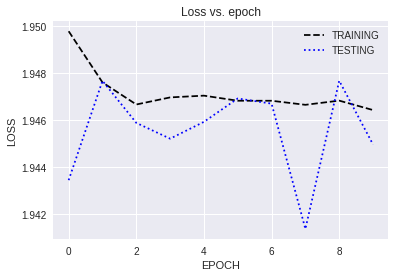

In [0]:
plt.plot(his.history['loss'],'--k')
plt.plot(his.history['val_loss'],':b')
plt.title('Loss vs. epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')


plt.show()

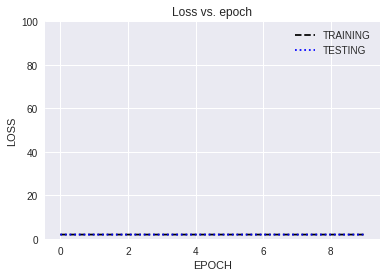

In [0]:
plt.plot(his.history['loss'],'--k')
plt.plot(his.history['val_loss'],':b')
plt.title('Loss vs. epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')
axes = plt.gca()
axes.set_ylim([0,100])

plt.show()

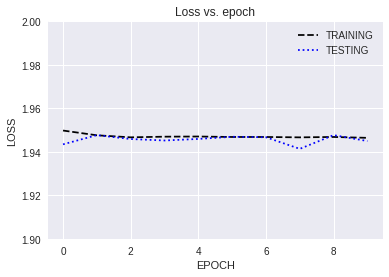

In [0]:
plt.plot(his.history['loss'],'--k')
plt.plot(his.history['val_loss'],':b')
plt.title('Loss vs. epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')
axes = plt.gca()
axes.set_ylim([1.9,2])

plt.show()

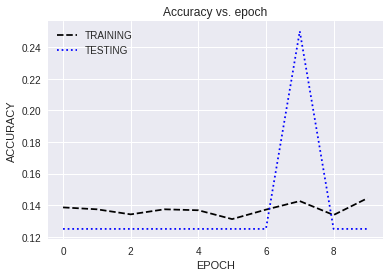

In [0]:
plt.plot(his.history['acc'],'--k')
plt.plot(his.history['val_acc'],':b')
plt.title('Accuracy vs. epoch')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')

plt.show()

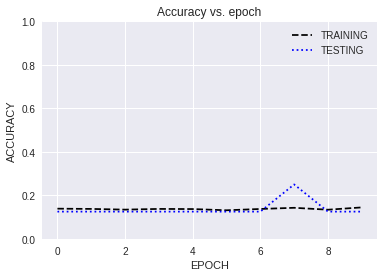

In [0]:
plt.plot(his.history['acc'],'--k')
plt.plot(his.history['val_acc'],':b')
plt.title('Accuracy vs. epoch')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

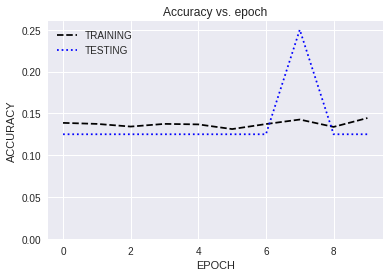

In [0]:
plt.plot(his.history['acc'],'--k')
plt.plot(his.history['val_acc'],':b')
plt.title('Accuracy vs. epoch')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')
axes = plt.gca()
axes.set_ylim([0,.26])
plt.show()

In [0]:
from keras.models import load_model
model.save('vgg19.h5')
model = load_model('vgg19.h5')
from google.colab import files
files.download('vgg19.h5') 

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 44850, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
import pickle

f = open('his_vgg19.pckl', 'wb')
pickle.dump(his, f)
f.close()

f = open('his_vgg19.pckl', 'rb')
his = pickle.load(f)
f.close()

files.download('his_vgg19.pckl') 

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 41312, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
y_hat = model.predict_classes(x_test)


In [0]:
print("Classification Report")
print(classification_report(y_test, y_hat, digits=5))

Classification Report
              precision    recall  f1-score   support

           0    0.14286   1.00000   0.25000       100
           1    0.00000   0.00000   0.00000       100
           2    0.00000   0.00000   0.00000       100
           3    0.00000   0.00000   0.00000       100
           4    0.00000   0.00000   0.00000       100
           5    0.00000   0.00000   0.00000       100
           6    0.00000   0.00000   0.00000       100

   micro avg    0.14286   0.14286   0.14286       700
   macro avg    0.02041   0.14286   0.03571       700
weighted avg    0.02041   0.14286   0.03571       700



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
print("ACCURACY:",(accuracy_score(y_test, y_hat)))

ACCURACY: 0.14285714285714285
